In [288]:
import numpy as np
import matplotlib.pyplot as plt


In [120]:
f = open("temp_data/Bi.txt")
energy = []
xsec = []
for line in f:
    energy.append(float(line[3:14])*1e6) # in eV
    #xsec.append(float(line[16:27]))
    xsec.append(float(line[20:27]))
energy = np.array(energy)
xsec = np.array(xsec)
f.close()

In [296]:
def XsecToTs(xsec, num_density):
    return np.exp(- num_density * xsec)

In [207]:
ar_bottle_pressure = 197.385 * 1e5 # in Pa (SI unit)
ar_bottle_temp = 293.0 # in Kelvin
n_density_Ar = 11 *(ar_bottle_pressure / (8.31446261815324 * ar_bottle_temp * 1e6)) * 6.02214076e23 * 1e-24
n_density_Bi_1 = 0.028087708697906597

In [297]:
transmission = XsecToTs(xsec, n_density_Ar)

In [188]:
en_min= 100
en_max = 1e4 #eV
en_Bi= []
tr_Bi=[]
for i in range(1000000):
    en = en_min + en_max * np.random.uniform()
    ts_Bi = np.interp(en, energy, transmission)
    tr = np.random.rand()*1
    if ts_Bi > tr:
        en_Bi.append(en)
        tr_Bi.append(tr)

In [78]:
def transmission(target_in, target_out):
    transmission = target_in / target_out
    error_transmission = transmission*np.sqrt(1.0/target_in + 1.0/target_out)
    return transmission, error_transmission

(100.0, 5000.0)

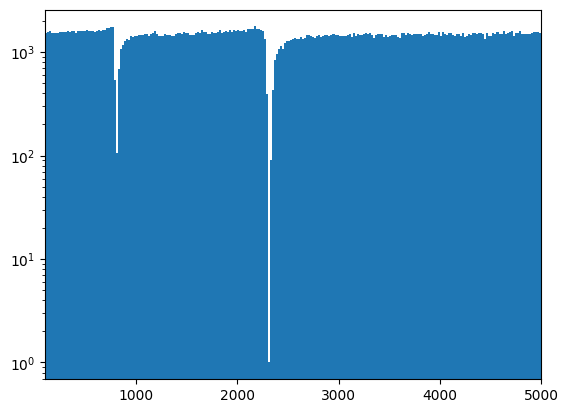

In [202]:
plt.hist(en_Bi,bins=500)
plt.yscale('log')
plt.xlim(100,5000)
#plt.xscale('log')

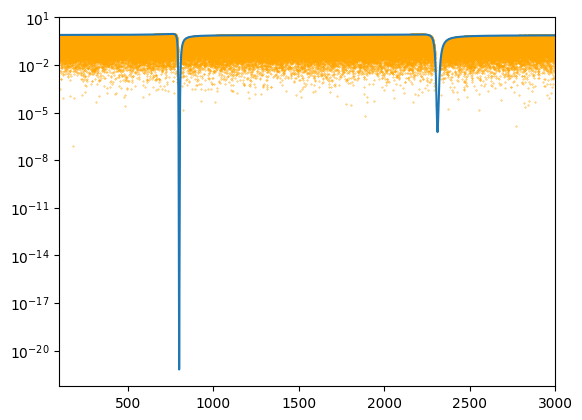

In [203]:
#plt.figure(figsize=(5,5))
plt.plot(energy,transmission)
plt.scatter(en_Bi,tr_Bi,s=0.1, c='orange')
plt.xlim(100,3000)
plt.yscale('log')


In [459]:
f = open("temp_data/Ar.txt")
energy = []
xsec = []
for line in f:
    energy.append(float(line[3:14])) # in eV
    xsec.append(float(line[16:27]))
    #xsec.append(float(line[20:27]))
energy = np.array(energy)
xsec = np.array(xsec)
f.close()

In [461]:
tof = EnergyToTOF(energy, 183.24 , 939.56542, 299792458)*1e9 # in ns 
tof = tof[::-1]
ts = XsecToTs(xsec, n_density_Ar)[::-1]

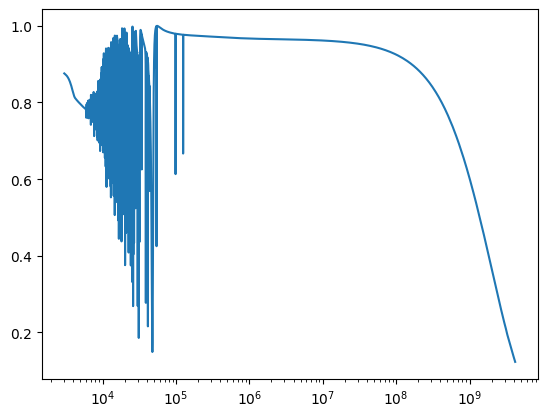

In [465]:
#plt.xlim(42000,420000)

plt.plot(tof,ts)
plt.xscale('log')

In [451]:
ts = XsecToTs(xsec, n_density_Ar)

In [369]:
en_min= 1e3
en_max = 1e6 #eV
en_Ar= []
tr_Ar=[]
en_out=[]
for i in range(10000000):
    en = np.random.uniform(en_min,en_max)
    ts_Ar = np.interp(en, energy, transmission)
    en_out.append(en)
    tr = np.random.rand()*1
    if ts_Ar > tr:
        en_Ar.append(en)
        tr_Ar.append(tr)

In [302]:
def transmis(target_in, target_out):
    transmission = target_in / target_out
    error_transmission = transmission*np.sqrt(1.0/target_in + 1.0/target_out)
    return transmission, error_transmission

In [371]:
#hist_in_en[ hist_in_en== 0] = 0.01
#hist_out_en[ hist_out_en== 0] = 0.01
tr,tr_error = transmis(hist_in_en,hist_out_en)

/var/folders/jq/rwhrsr9j0kv4_6rw6htyzjk40000gn/T/ipykernel_91565/379002130.py:2: RuntimeWarning: invalid value encountered in divide
  transmission = target_in / target_out
/var/folders/jq/rwhrsr9j0kv4_6rw6htyzjk40000gn/T/ipykernel_91565/379002130.py:3: RuntimeWarning: divide by zero encountered in divide
  error_transmission = transmission*np.sqrt(1.0/target_in + 1.0/target_out)


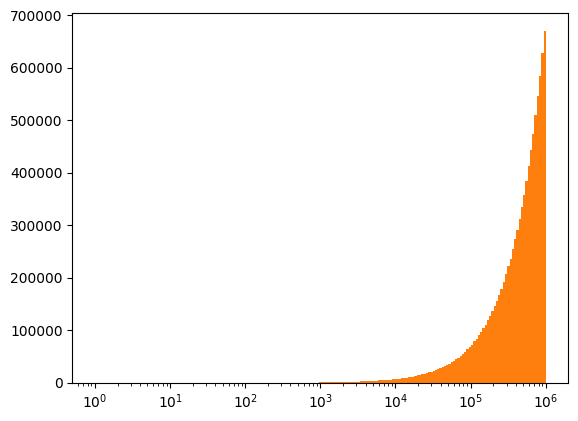

In [370]:
logbins = np.logspace(0,6,200)
hist_in_en,bins_in_en,_ = plt.hist(en_Ar,bins=logbins)
hist_out_en,bins_out_en,_ = plt.hist(en_out,bins=logbins)
plt.xscale('log')

<Figure size 640x480 with 0 Axes>

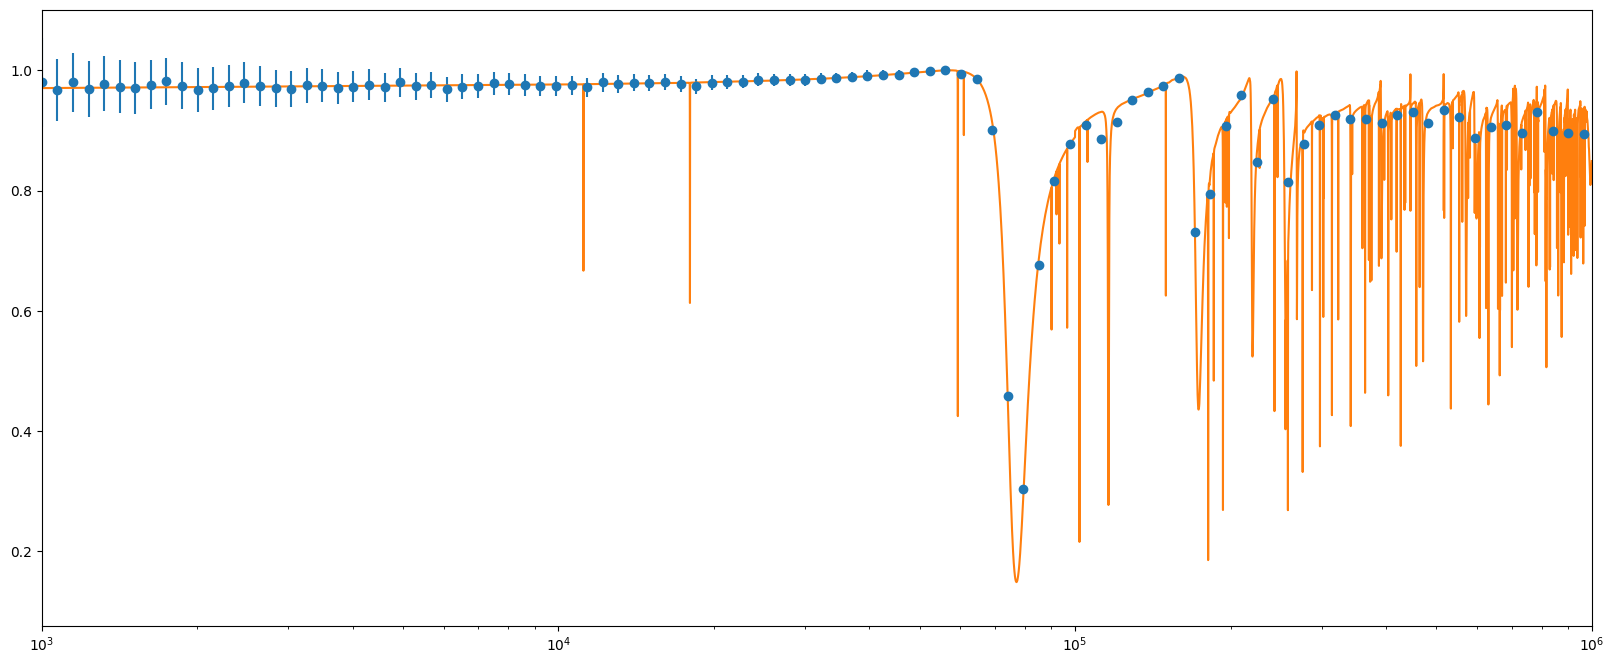

In [372]:
en_bin = (bins_in_en[1:] + bins_in_en[:-1]) / 2
plt.clf()
plt.figure(figsize=(20,8))
plt.errorbar(en_bin,tr,tr_error,fmt ='o')
plt.xlim(1e3,1e6)

plt.plot(energy,ts)
plt.xscale('log')

(1000.0, 1000000.0)

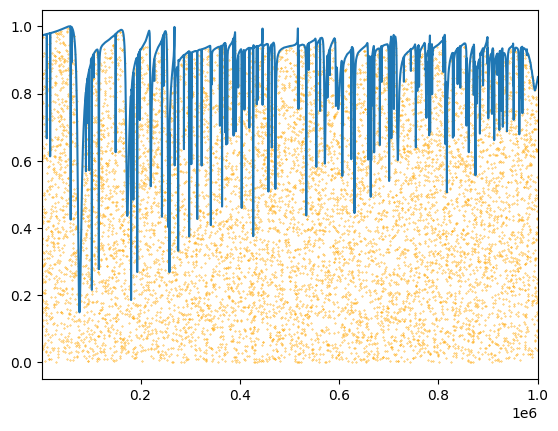

In [342]:
plt.plot(energy,ts)
plt.scatter(en_Ar,tr_Ar,s=0.1, c='orange')
plt.xlim(1e3,1e6)
#plt.yscale('log')
#plt.xscale('log')

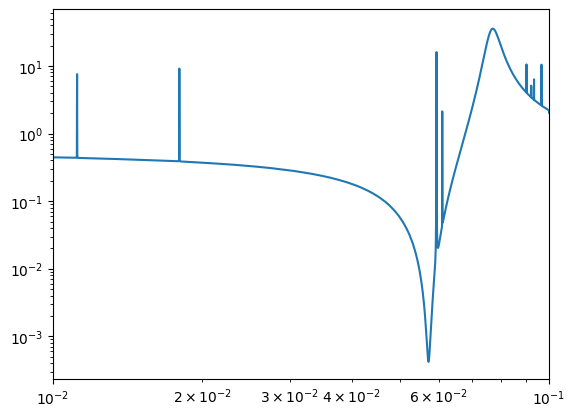

In [336]:
plt.plot(energy*1e-6,xsec)
plt.xlim(1e-2,1e-1)
plt.yscale('log')
plt.xscale('log')

In [387]:
import uproot


In [388]:
file = uproot.open("data/Neutron_Gamma_Flux_1cmColli_188m.root")

In [390]:
import ROOT

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C clang++    -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.28/04


In [391]:
fileName = ROOT.TFile.Open("data/Neutron_Gamma_Flux_1cmColli_188m.root", "READ")

In [392]:
c1 = fileName.Get("Canvas_1")

In [393]:
h1 = c1.GetPrimitive("histfluka")

In [436]:
h1.GetXaxis().GetBinLowEdge(11269) 

430526.610491711

In [432]:
h1.GetBinContent()

4805.1550379

In [430]:
h1.GetXaxis().GetBinUpEdge(11269)

431022.5580049957

In [425]:
h1.GetXaxis().GetBinCenter(11269)

430774.5842483534

In [427]:
h1.GetXaxis().GetBinCenter(9260)

42633.41011921906

In [420]:
def TOFToEnergy(tof, x, m, c):
    return m * (1 / np.sqrt(1 - x * x / c / c / tof / tof) - 1) 

In [421]:
def EnergyToTOF(energy, x, m,c):
    return x /c/np.sqrt(1-(m*m/(energy + m)/(energy + m )))

In [423]:
L=188
EnergyToTOF(1000/1e6, L , 939.56542, 299792458)*1e9 # in ns 


429819.39392130735

In [424]:
EnergyToTOF(100000/1e6, L , 939.56542, 299792458)*1e9

42985.335999105155

In [437]:
date=[1018,1019,1020,1021,1022,1023]
bin_40=[10.1,10.5,10.6,10.8,12.8,12.3]
bin_40_err = [1.7,1.5,1.1,1.1,1.1,1.7]
bin_30=[9.3,9.9,10.4,10.2,12.2,11.8]
bin_30_err = [1.6,1.4,1.0,1.1,1.1,1.7]
bin_20=[9.4,9.6,10.5,10.1,12.1,12.3]
bin_20_err = [1.8,1.4,1.1,1.2,1.1,1.7]
bin_50 = [10.0,11.3,10.8,10.8,12.8,13.8]
bin_50_err = [1.7,1.6,1.1,1.2,1.1,1.9]

<ErrorbarContainer object of 3 artists>

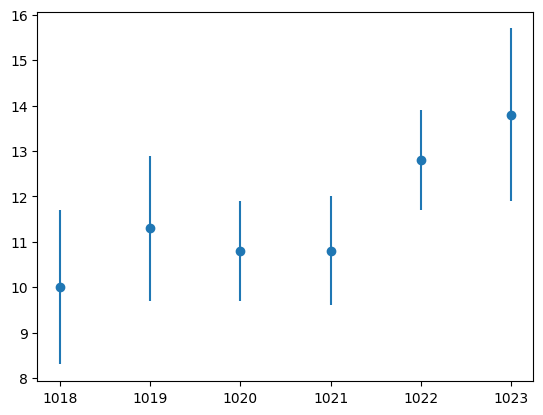

In [446]:
plt.errorbar(date,bin_50,bin_50_err,fmt ='o',label= 'bin_50')

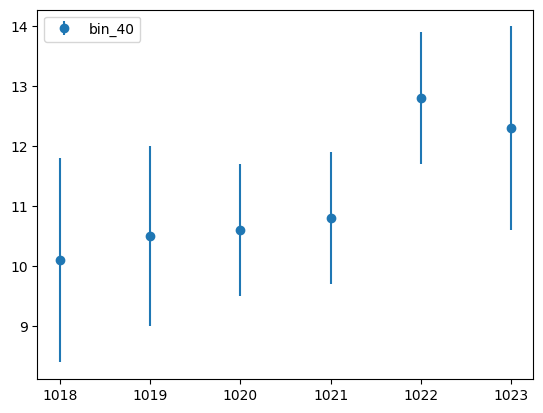

In [443]:
plt.errorbar(date,bin_40,bin_40_err,fmt ='o',label= 'bin_40')

plt.legend(loc = 'upper left')


<ErrorbarContainer object of 3 artists>

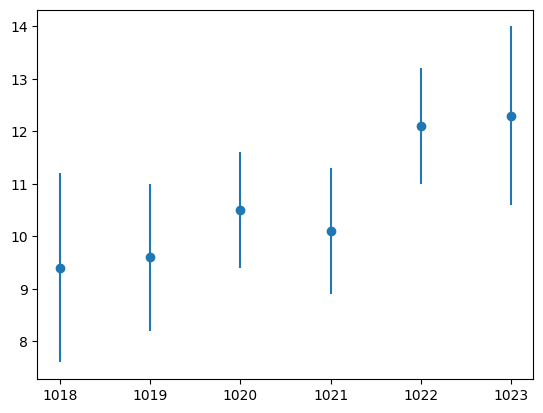

In [444]:
plt.errorbar(date,bin_20,bin_20_err,fmt ='o',label= 'bin_20')


<ErrorbarContainer object of 3 artists>

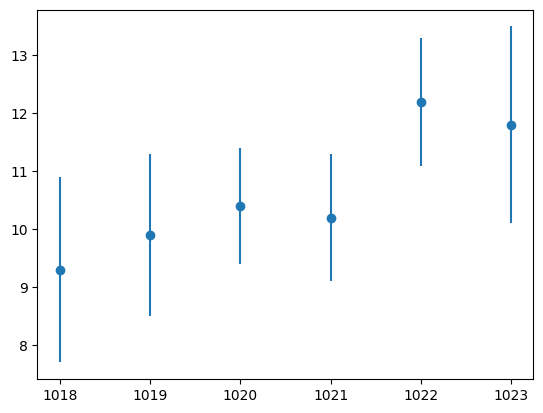

In [445]:
plt.errorbar(date,bin_30,bin_30_err,fmt ='o',label= 'bin_30')
